<a href="https://colab.research.google.com/github/abdifatahmain/dataVIZ/blob/main/analytics_ML_training_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model preprocessing and training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

## Understanding the dimensionality of data as a whole

In [ ]:
%ls "/content/drive/MyDrive/data/beijing+multi+site+air+quality+data"

data.csv  PRSA2017_Data_20130301-20170228.zip  PRSA_Data_20130301-20170228/  test.csv


In [ ]:
%ls "/content/drive/MyDrive/data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv        PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [ ]:
# We load all the names of all the available datasets into an array
data_sets = os.listdir("/content/drive/MyDrive/data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228")

## Data dimensionality

In [ ]:
relative_path  = "/content/drive/MyDrive/data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"
for i in data_sets:
    path = os.path.join(relative_path, i)
    df = pd.read_csv(filepath_or_buffer = path)
    print(f"Dataset: {i} --- Shape: {df.shape}")
    print()


Dataset: PRSA_Data_Aotizhongxin_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Wanliu_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Tiantan_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Wanshouxigong_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Changping_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Guanyuan_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Dongsi_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Gucheng_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Dingling_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Shunyi_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Huairou_20130301-20170228.csv --- Shape: (35064, 18)

Dataset: PRSA_Data_Nongzhanguan_20130301-20170228.csv --- Shape: (35064, 18)



In [ ]:
def info_datasets(data_sets:list):
    info_data = []

    for idx, dataset in enumerate(data_sets):
        df = pd.read_csv(os.path.join(relative_path, dataset))
        info = {}
        info['DataFrame'] = dataset
        info['Columns'] = df.columns.tolist()
        info['Dtypes'] = df.dtypes.tolist()
        info['Rows'] = df.shape[0]
        info_data.append(info)

    info_df = pd.DataFrame(info_data)

    return info_df
df_info = info_datasets(data_sets = data_sets)


for i in df_info.columns:
    df_info[i] = df_info[i].astype('str')
df_info

,DataFrame,Columns,Dtypes,Rows
0,PRSA_Data_Aotizhongxin_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
1,PRSA_Data_Wanliu_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
2,PRSA_Data_Tiantan_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
3,PRSA_Data_Wanshouxigong_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
4,PRSA_Data_Changping_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
5,PRSA_Data_Guanyuan_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
6,PRSA_Data_Dongsi_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
7,PRSA_Data_Gucheng_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
8,PRSA_Data_Dingling_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064
9,PRSA_Data_Shunyi_20130301-20170228.csv,"['No', 'year', 'month', 'day', 'hour', 'PM2.5'...","[dtype('int64'), dtype('int64'), dtype('int64'...",35064


In [ ]:
for i in df_info.columns[1:]:
    print(f"Column name: {i}")
    print(f"Uniques values: {df_info[i].unique()}")
    print()

Column name: Columns
Uniques values: ["['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']"]

Column name: Dtypes
Uniques values: ["[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O')]"]

Column name: Rows
Uniques values: ['35064']



Dimension At this point from the above, we can conclude that all data sets are structurally the same.nality of the data


In [ ]:
# If we want to join the data it must be on this line
df1 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Guanyuan_20130301-20170228.csv"))
df2 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Shunyi_20130301-20170228.csv"))
df3 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Tiantan_20130301-20170228.csv"))
df4 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Changping_20130301-20170228.csv"))
df5 = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Wanshouxigong_20130301-20170228.csv"))
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175315,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
175316,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
175317,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
175318,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
# We quickly verify the data types of our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    171644 non-null  float64
 6   PM10     172680 non-null  float64
 7   SO2      171135 non-null  float64
 8   NO2      171131 non-null  float64
 9   CO       167445 non-null  float64
 10  O3       170133 non-null  float64
 11  TEMP     175157 non-null  float64
 12  PRES     175160 non-null  float64
 13  DEWP     175154 non-null  float64
 14  RAIN     175159 non-null  float64
 15  wd       174459 non-null  object 
 16  WSPM     175192 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 24.1+ MB


In [ ]:
# Function to calculate the AQI
def calculate_aqi_category(row):
    pollutants = {
        'PM2.5': [(0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'CO': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 404, 301, 400), (405, 504, 401, 500), (505, 604, 501, 600)]
    }

    aqi = 0
    for pollutant, ranges in pollutants.items():
        concentration = row[pollutant]
        for r in ranges:
            if r[0] <= concentration <= r[1]:
                B_low, B_high, I_low, I_high = r
                aqi = max(aqi, ((I_high - I_low) / (B_high - B_low)) * (concentration - B_low) + I_low)
                break

    if aqi <= 100:
        return 'Excellent - Good'
    elif aqi <= 200:
        return 'Slightly - Lightly Polluted'
    elif aqi <= 300:
        return 'Moderately - Heavily Polluted'
    else:
        return 'Severely Polluted'


df['AQI'] = df.apply(calculate_aqi_category, axis=1)

In [ ]:
# We observe the new AQI column
df['AQI']

,AQI
0,Excellent - Good
1,Slightly - Lightly Polluted
2,Excellent - Good
3,Excellent - Good
4,Slightly - Lightly Polluted
...,...
175315,Slightly - Lightly Polluted
175316,Excellent - Good
175317,Excellent - Good
175318,Excellent - Good


# Preprocessing

## Identification of important columns

In [ ]:
columns_to_delete = ['No']
df = df.drop(columns_to_delete, axis = 1)

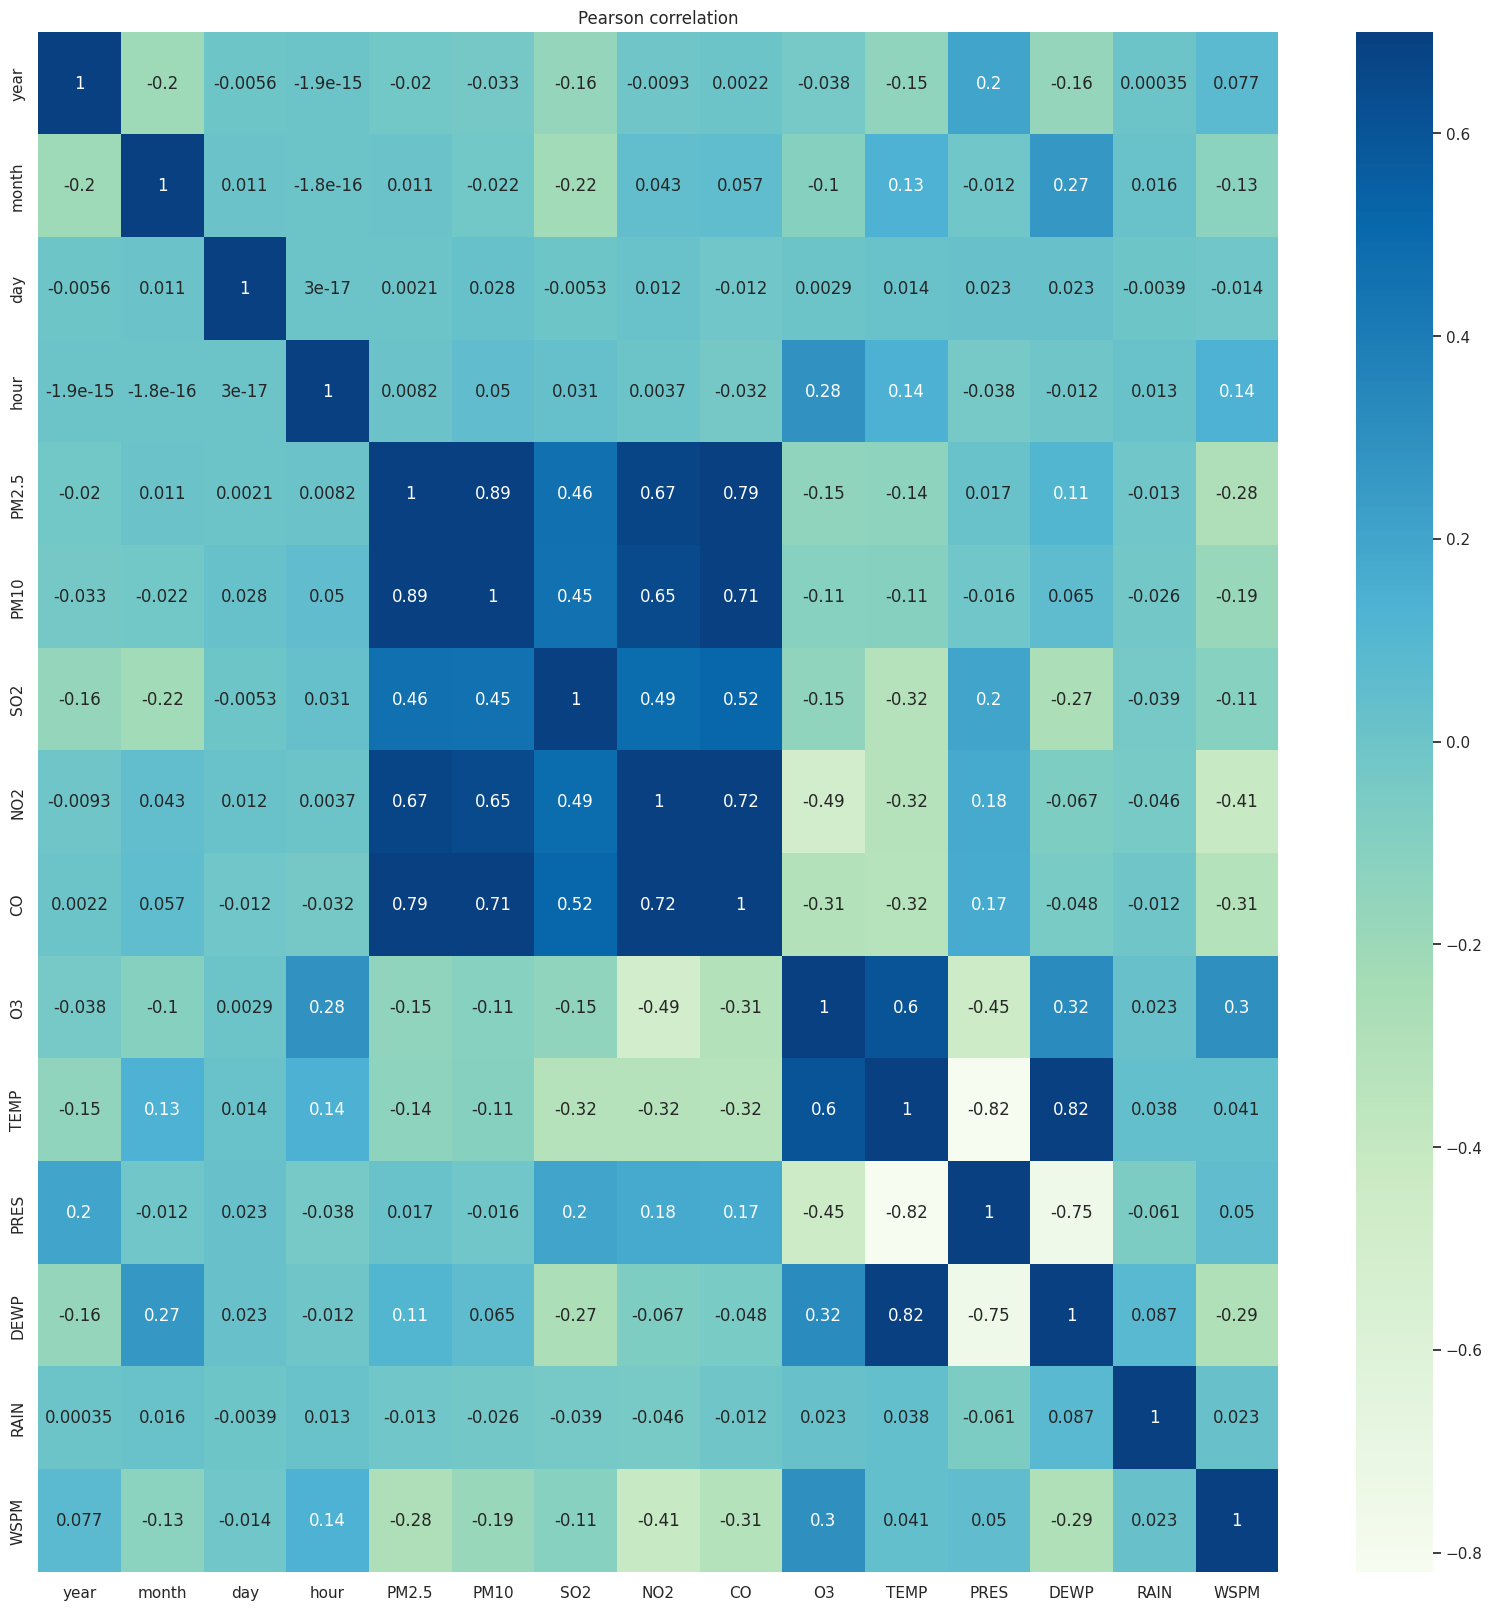

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Set up Seaborn
sns.set(style='whitegrid', font_scale=1)

# Create the figure
plt.figure(figsize=(20,20))

# Set the title
plt.title('Pearson correlation')

# Create the heatmap
sns.heatmap(df_numeric.corr(), vmax=0.7, annot=True, cmap='GnBu')

# Shows the atmap graph
plt.show()

In [ ]:
# We eliminate the columns for a very high correlation

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Create a correlation matrix
corr_matrix = df_numeric.corr().abs()

# Choose a high correlation threshold, for example 0.8
high_corr_thresh = 0.8

# Create a set to hold the names of the columns to be removed
cols_to_drop = set()

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > high_corr_thresh:
            colname = corr_matrix.columns[i]  # get column name
            cols_to_drop.add(colname)

# Remove highly correlated columns
df_numeric_dropped = df_numeric.drop(cols_to_drop, axis=1)
df_numeric_dropped

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,WSPM
0,2013,3,1,0,4.0,14.0,20.0,300.0,69.0,-0.7,0.0,4.4
1,2013,3,1,1,4.0,13.0,17.0,300.0,72.0,-1.1,0.0,4.7
2,2013,3,1,2,3.0,10.0,19.0,300.0,69.0,-1.1,0.0,5.6
3,2013,3,1,3,3.0,7.0,24.0,400.0,62.0,-1.4,0.0,3.1
4,2013,3,1,4,3.0,5.0,14.0,400.0,71.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175315,2017,2,28,19,11.0,3.0,24.0,400.0,72.0,12.5,0.0,2.4
175316,2017,2,28,20,13.0,3.0,41.0,500.0,50.0,11.6,0.0,0.9
175317,2017,2,28,21,14.0,4.0,38.0,500.0,54.0,10.8,0.0,1.1
175318,2017,2,28,22,12.0,4.0,30.0,400.0,59.0,10.5,0.0,1.2


In [ ]:
# We join with the previous dataset
df_non_numeric = df.select_dtypes(exclude=[np.number])
df_final = df_numeric_dropped.join(df_non_numeric)
df = df_final

## Nulls

<Axes: >

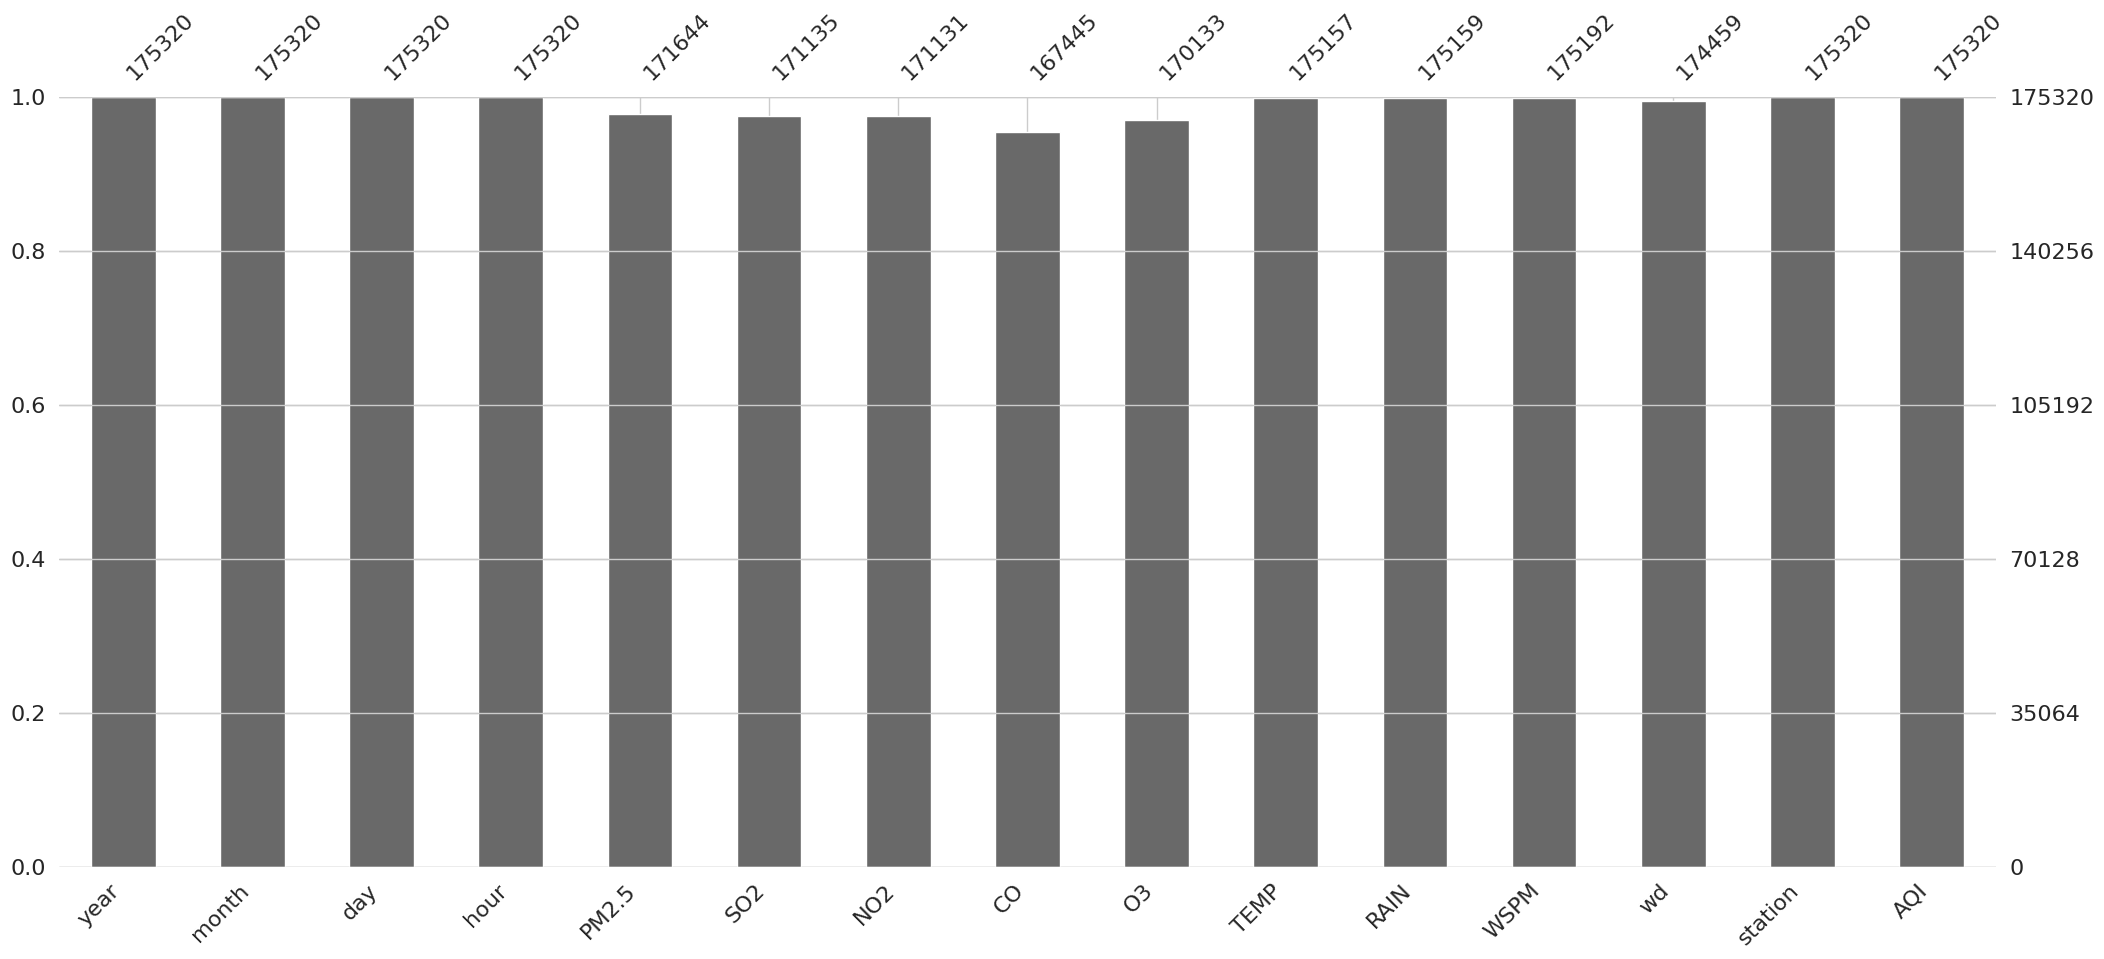

In [ ]:
msno.bar(df)

In [ ]:
total_rows = df.shape[0]
rows_with_missing = df.isnull().any(axis=1).sum()
missing_row_proportion = (rows_with_missing / total_rows) * 100

print(f"Proportion of null values {round(missing_row_proportion,2)}%")
#TODO: Test if imputation improves

Proportion of null values 8.27%


### Data Imputation

In [ ]:
# Copy the original DataFrame
df_filled = df_final.copy()

# Calculate the mean of numerical columns
mean_values = df_final.select_dtypes(include=[np.number]).mean()

# Fill the NaNs in the numerical columns with the calculated means
df_filled.loc[:, mean_values.index] = df_final.select_dtypes(include=[np.number]).fillna(mean_values)
df_filled

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,wd,station,AQI
0,2013,3,1,0,4.0,14.0,20.0,300.0,69.0,-0.7,0.0,4.4,NNW,Guanyuan,Excellent - Good
1,2013,3,1,1,4.0,13.0,17.0,300.0,72.0,-1.1,0.0,4.7,N,Guanyuan,Slightly - Lightly Polluted
2,2013,3,1,2,3.0,10.0,19.0,300.0,69.0,-1.1,0.0,5.6,NNW,Guanyuan,Excellent - Good
3,2013,3,1,3,3.0,7.0,24.0,400.0,62.0,-1.4,0.0,3.1,NW,Guanyuan,Excellent - Good
4,2013,3,1,4,3.0,5.0,14.0,400.0,71.0,-2.0,0.0,2.0,N,Guanyuan,Slightly - Lightly Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175315,2017,2,28,19,11.0,3.0,24.0,400.0,72.0,12.5,0.0,2.4,NW,Wanshouxigong,Slightly - Lightly Polluted
175316,2017,2,28,20,13.0,3.0,41.0,500.0,50.0,11.6,0.0,0.9,WNW,Wanshouxigong,Excellent - Good
175317,2017,2,28,21,14.0,4.0,38.0,500.0,54.0,10.8,0.0,1.1,NW,Wanshouxigong,Excellent - Good
175318,2017,2,28,22,12.0,4.0,30.0,400.0,59.0,10.5,0.0,1.2,NNW,Wanshouxigong,Excellent - Good


In [ ]:
# We check where we still have nulls
df_filled.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0


In [ ]:
# For the column with null values, we apply dummies, since these values ​​are fixed.
df_filled = pd.get_dummies(df_filled, columns=['wd'])

In [ ]:
df = df_filled.copy()

In [ ]:
# We look at the columns to understand the application of dummies.
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'RAIN', 'WSPM', 'station', 'AQI', 'wd_E', 'wd_ENE', 'wd_ESE',
       'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE',
       'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW'],
      dtype='object')

In [ ]:
df['AQI'].unique()

array(['Excellent - Good', 'Slightly - Lightly Polluted',
       'Moderately - Heavily Polluted', 'Severely Polluted'], dtype=object)

In [ ]:
# We perform an Encoding of the columns with categorical values.
le = LabelEncoder()

df['station'] = le.fit_transform(df['station'])
df['AQI'] = le.fit_transform(df['AQI'])

In [ ]:
df[['station','AQI']]


,station,AQI
0,1,0
1,1,3
2,1,0
3,1,0
4,1,3
...,...,...
175315,4,3
175316,4,0
175317,4,0
175318,4,0


## Data Balancing

In [ ]:
df['AQI'].value_counts()

,count
AQI,
3,79303
0,46178
1,36620
2,13219


We clearly observe that the classes are not balanced.

In [ ]:
# Separate features (X) and labels (y)
X = df.drop('AQI', axis=1)
y = df['AQI']

ros = RandomOverSampler()
X, y = ros.fit_resample(X,y)
y.value_counts()

,count
AQI,
0,79303
3,79303
1,79303
2,79303


In [ ]:
df_balanced = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['AQI'])], axis=1)
class_counts = df_balanced['AQI'].value_counts()
print(class_counts)

AQI
0    79303
3    79303
1    79303
2    79303
Name: count, dtype: int64


In [ ]:
# We standardize names
df = df_balanced

# Train the model - Decision Tree

In [ ]:
X = df.drop('AQI', axis = 1)
y = df['AQI']

In [ ]:
# Data scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123,test_size=0.3)

Accuracy: 99.65%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23681
           1       1.00      1.00      1.00     23873
           2       1.00      1.00      1.00     23718
           3       1.00      0.99      0.99     23892

    accuracy                           1.00     95164
   macro avg       1.00      1.00      1.00     95164
weighted avg       1.00      1.00      1.00     95164



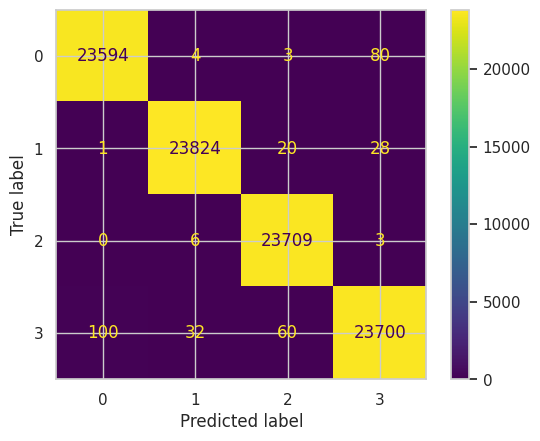

In [ ]:
# Model instance
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print a classification report
report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

# confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


## Cross validation

In [ ]:
# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

best_clf = grid_search.best_estimator_

cv_scores = cross_val_score(best_clf, X_train, y_train, cv=10)

print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()


# At this point we can choose the best parameters for the model. It has been tested for several numbers of data sets, and continues to give the best result as shown above.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

best_params =  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

clf = DecisionTreeClassifier(**best_params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

report = classification_report(y_test, y_pred)
print('Classification report:')
print(report)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Lists to store accuracy values
train_acc = []
test_acc = []

# Range of tree depths to try
depths = list(range(1, 100))

# Fit a decision tree for each depth value
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train accuracy')
plt.plot(depths, test_acc, label='Test accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth')
plt.show()
